## WeatherPy
----

#### Anaylsis
* It appears that cities with a latitude greater than 20 are currently experiencing autumn, or wintry conditions. The temperature decreases the further north the city is, and the most common reported cloudiness is 100%.
* Humidity seems especially high for those cities with a latitude greater than 40 degrees. This can be seen in the visualization below.
* Wind speed tends not to exceed 25 mph, with a few exceptions in northern cities. This can be seen in the visualization below.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities_weather.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# build url for api request
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "&units=imperial"
req_url = base_url + "appid=" + api_key + units + "&q="

In [4]:
#from each city, get country, temp, cloudiness, humidity, wind speed, latitude, longitude, and date
#use lists to simplify creating the data frame
names = []
countries = []
temps = []
clouds = []
hums = []
winds = []
lats = []
lons = []
dates = []

In [5]:
for i, city in enumerate(cities):
    print("Processing City #" + str(i) + " : " + city) #for terminal print
    resp = requests.get(req_url + city)
    resp_json = resp.json()
    if resp_json['cod'] == "404": #city not found
        print("Skipped city #" + str(i) + " : " + city) #the json is different in this case
        continue
    else:
        names.append(resp_json['name'])
        countries.append(resp_json['sys']['country'])
        temps.append(resp_json['main']['temp'])
        clouds.append(resp_json['clouds']['all'])
        hums.append(resp_json['main']['humidity'])
        winds.append(resp_json['wind']['speed'])
        lats.append(resp_json['coord']['lat'])
        lons.append(resp_json['coord']['lon'])
        dates.append(resp_json['dt'])

Processing City #0 : tevriz
Processing City #1 : tomatlan
Processing City #2 : qandahar
Skipped city #2 : qandahar
Processing City #3 : sentyabrskiy
Skipped city #3 : sentyabrskiy
Processing City #4 : punta arenas
Processing City #5 : airai
Processing City #6 : coahuayana
Processing City #7 : santa adelia
Processing City #8 : barentsburg
Skipped city #8 : barentsburg
Processing City #9 : isiro
Processing City #10 : tutoia
Processing City #11 : rikitea
Processing City #12 : mataura
Processing City #13 : albany
Processing City #14 : busselton
Processing City #15 : slonim
Processing City #16 : poya
Processing City #17 : victoria
Processing City #18 : upernavik
Processing City #19 : amderma
Skipped city #19 : amderma
Processing City #20 : nikolskoye
Processing City #21 : lavrentiya
Processing City #22 : manga
Processing City #23 : hobart
Processing City #24 : mogadishu
Processing City #25 : atuona
Processing City #26 : port alfred
Processing City #27 : eenhana
Processing City #28 : saint-p

Processing City #235 : hamilton
Processing City #236 : pitimbu
Processing City #237 : asfi
Skipped city #237 : asfi
Processing City #238 : vardo
Processing City #239 : skibbereen
Processing City #240 : ponta delgada
Processing City #241 : khatanga
Processing City #242 : thinadhoo
Processing City #243 : puerto baquerizo moreno
Processing City #244 : ciro marina
Processing City #245 : novotroitskaya
Processing City #246 : kodiak
Processing City #247 : maryville
Processing City #248 : talaya
Processing City #249 : mangla
Processing City #250 : todos santos
Processing City #251 : angangxi
Skipped city #251 : angangxi
Processing City #252 : faanui
Processing City #253 : paamiut
Processing City #254 : kirando
Processing City #255 : alofi
Processing City #256 : kumluca
Processing City #257 : itainopolis
Skipped city #257 : itainopolis
Processing City #258 : kalmunai
Processing City #259 : clyde river
Processing City #260 : nikolsk
Processing City #261 : chapada dos guimaraes
Processing City #

Processing City #471 : riyadh
Processing City #472 : chifeng
Processing City #473 : vila velha
Processing City #474 : samalaeulu
Skipped city #474 : samalaeulu
Processing City #475 : sao joao da barra
Processing City #476 : nara
Processing City #477 : kousseri
Skipped city #477 : kousseri
Processing City #478 : ciras
Skipped city #478 : ciras
Processing City #479 : kieta
Processing City #480 : haines junction
Processing City #481 : peleduy
Processing City #482 : whitehorse
Processing City #483 : kindu
Processing City #484 : taltal
Processing City #485 : burgeo
Processing City #486 : bintulu
Processing City #487 : manhush
Processing City #488 : broome
Processing City #489 : launceston
Processing City #490 : celica
Processing City #491 : mount darwin
Processing City #492 : labutta
Skipped city #492 : labutta
Processing City #493 : ruatoria
Skipped city #493 : ruatoria
Processing City #494 : goderich
Processing City #495 : padang
Processing City #496 : cockburn harbour
Skipped city #496 :

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
df = pd.DataFrame({'City' : names, 'Country' : countries, 'Date' : dates,
                  'Lat' : lats, 'Lng' : lons, 'Temp (F)' : temps,
                  'Humidity' : hums, 'Wind Speed (mph)' : winds, 'Cloudiness' : clouds})
df

,City,Country,Date,Lat,Lng,Temp (F),Humidity,Wind Speed (mph),Cloudiness
0,Tevriz,RU,1573968789,57.51,72.40,28.08,92,5.61,100
1,Tomatlan,MX,1573968789,19.93,-105.25,67.48,89,4.27,100
2,Punta Arenas,CL,1573968790,-53.16,-70.91,44.28,75,8.05,56
3,Airai,TL,1573968790,-8.93,125.41,86.90,29,8.50,3
4,Coahuayana,MX,1573968790,18.62,-100.35,69.46,88,3.56,29
...,...,...,...,...,...,...,...,...,...
527,Provost,CA,1573968878,52.35,-110.26,30.92,87,7.76,90
528,Lixourion,GR,1573968878,38.20,20.43,67.57,71,17.29,100
529,Norman Wells,CA,1573968878,65.28,-126.83,-5.80,76,1.90,90
530,Rondonopolis,BR,1573968879,-16.46,-54.64,72.81,80,1.03,82


In [10]:
df.to_csv(path_or_buf=output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

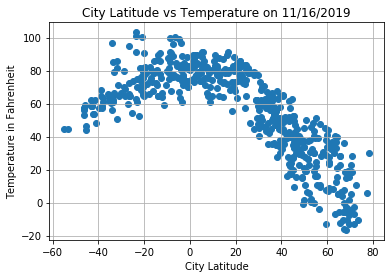

In [11]:
plt.scatter(df['Lat'], df['Temp (F)'])
plt.xlabel('City Latitude')
plt.ylabel('Temperature in Fahrenheit')
plt.grid()
plt.title('City Latitude vs Temperature on ' + time.strftime("%m/%d/%Y", time.localtime()))
plt.savefig('Lat_x_Temp')

#### Latitude vs. Humidity Plot

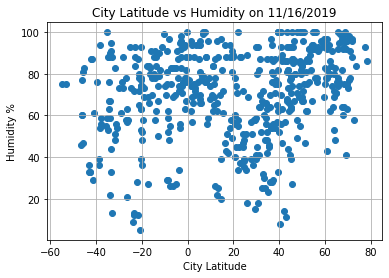

In [12]:
plt.scatter(df['Lat'], df['Humidity'])
plt.xlabel('City Latitude')
plt.ylabel('Humidity %')
plt.grid()
plt.title('City Latitude vs Humidity on ' + time.strftime("%m/%d/%Y", time.localtime()))
plt.savefig('Lat_x_Hum')

#### Latitude vs. Cloudiness Plot

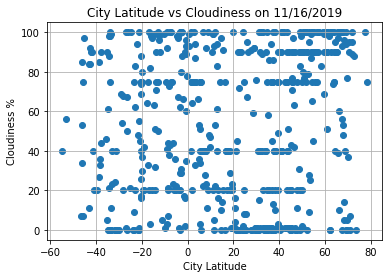

In [13]:
plt.scatter(df['Lat'], df['Cloudiness'])
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness %')
plt.grid()
plt.title('City Latitude vs Cloudiness on ' + time.strftime("%m/%d/%Y", time.localtime()))
plt.savefig('Lat_x_Cloud')

#### Latitude vs. Wind Speed Plot

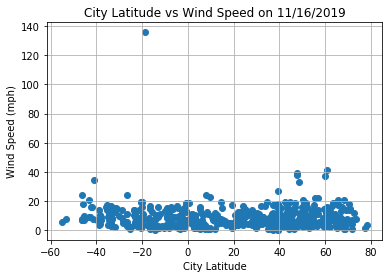

In [14]:
plt.scatter(df['Lat'], df['Wind Speed (mph)'])
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.title('City Latitude vs Wind Speed on ' + time.strftime("%m/%d/%Y", time.localtime()))
plt.savefig('Lat_x_Wind')